In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as sm
from scipy.stats import norm, skew
import scipy.stats as stats
%matplotlib inline

In [140]:
train = pd.read_csv('../../../Data/train.csv')
test = pd.read_csv('../../../Data/test.csv')

In [141]:
test.shape

(1459, 80)

In [142]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [143]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [144]:
train.shape

(1460, 81)

In [145]:
test.shape

(1459, 80)

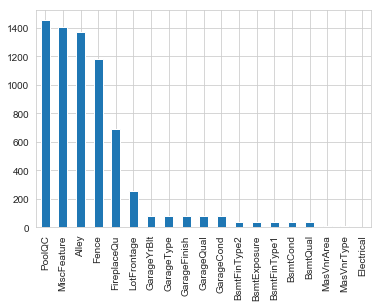

In [146]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending = False,inplace=True)
missing.plot.bar()

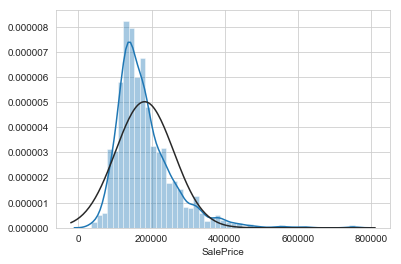

In [147]:
sns.distplot(train['SalePrice'], fit = stats.norm)

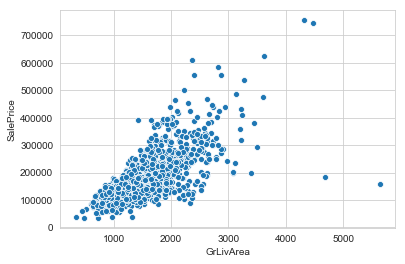

In [148]:
sns.scatterplot(x = train['GrLivArea'],y = train['SalePrice'])

In [149]:
train = train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index)

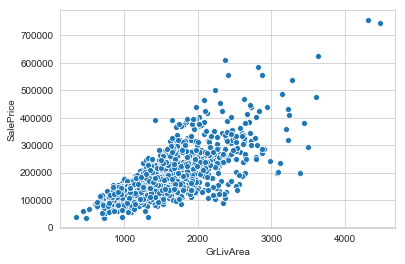

In [150]:
sns.scatterplot(y = train['SalePrice'], x = train['GrLivArea'])

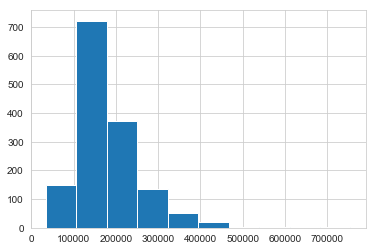

In [151]:
train['SalePrice'].hist()

In [152]:
train['SalePrice'] = np.log1p(train['SalePrice'])

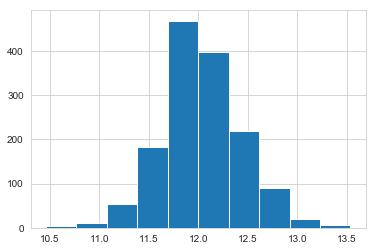

In [153]:
train['SalePrice'].hist()

In [154]:
train_features = train.drop('SalePrice', axis = 1)
y = train['SalePrice'].reset_index(drop=True)
test_features = test
features = pd.concat([train_features, test_features]).reset_index(drop= True)

In [155]:
ntrain = train_features.shape[0]

In [156]:
features.shape

(2917, 80)

In [157]:
features.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


Convert Year Variables to strings

In [158]:
#for i in ['MSSubClass', 'YrSold', 'MoSold', 'GarageYrBlt']:
#   features[i] = features[i].apply(lambda x: str(x))

In [159]:
def missing_vals(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (total/len(df)*100)
    missing = percent[percent>0]
    return pd.DataFrame( missing, columns = ['Percent'])

In [160]:
missing_vals(features)

,Percent
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageCond,5.450806
GarageQual,5.450806
GarageFinish,5.450806
GarageType,5.382242


- Electrical, KitchenQual has one Na values and Functional has two Na values. The Na values was therefore set to the Mode

In [161]:
for i in 'Functional Electrical KitchenQual'.split():
    features[i] = features[i].fillna(features[i].mode()[0])

- PoolQC ,MiscFeature, Alley, Fence, FireplaceQu 

In [162]:
for i in 'PoolQC MiscFeature Alley Fence FireplaceQu'.split():
    features[i] = features[i].fillna('None')

- LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [163]:
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median())) #Might be a flat

- GarageType, GarageFinish, GarageQual ,GarageCond are all categorical values and because there is more than one missing value in all of them, the Na value is replaced with None

In [164]:
for i in 'GarageYrBlt','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'.split():
    features[i] = features[i].fillna('None')

- The missing values are replaced with 0 because if GarageYrBlt, GarageArea, GarageCars, are 0 and numerical features it means that there is no garage


In [165]:
for i in'GarageArea', 'GarageCars'.split():
    features[i] = features[i].fillna(0)

- If any of the numerical Basement variables are zero, it means there is simply no Basement

In [166]:
for i in 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'.split():
    features[i] = features[i].fillna(0)

- If any of the categorical variables for Basement is zero, it means there is simply no Basement

In [167]:
for i in 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'.split():
    features[i] = features[i].fillna('None')

- If there is missing vals in the Masonary category, it simply means no masonary is part of the house, the categorical variable (MasVnrType) is set to None and the numerical variable (MasVnrArea) is set to 0

In [168]:
features["MasVnrType"] = features["MasVnrType"].fillna("None")
features["MasVnrArea"] = features["MasVnrArea"].fillna(0)

- There are 4 missing values in MSZoning, therefore because it is a categorical values, it is set to the mode

In [169]:
features['MSZoning'] = features['MSZoning'].fillna(features['MSZoning'].mode()[0])

- Exterior1, Exterior2 and SaleType has 1 missing value, and because it is a categorical value, it will be set to the mode

In [170]:
for i in 'Exterior1st Exterior2nd SaleType'.split():
    features[i] = features[i].fillna(features[i].mode()[0])

- MSSubClass has one missing value, it will be set to None

In [171]:
features['MSSubClass'] = features['MSSubClass'].fillna("None")

- Utilities, street and PoolQc is dropped because most houses does not have a Pool, and because the only Feature in Utilities are all AllPub except for two, and street

In [172]:
features = features.drop(['Utilities', 'PoolQC'], axis=1)

Lets see if there is more missing values in the Dataset

In [173]:
missing_vals(features)

,Percent


- Some more Feature Engineering

In [174]:
features['YrBuiltandRemod'] = features['YearBuilt']+features['YearRemodAdd']

In [175]:
features['TotSqrSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

In [176]:
features['Haspool'] = features['PoolArea'].apply(lambda x: 1 if x> 0 else 0)
features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1 if x> 0 else 0)
features['HasGarage'] = features['GarageArea'].apply(lambda x: 1 if x> 0 else 0)
features['HasBsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x> 0 else 0)
features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x> 0 else 0)

In [249]:
features = pd.get_dummies(features)
features.shape

(2917, 436)

In [250]:
X_train = features[:ntrain]
X_test = features[ntrain:-1]

In [251]:
X_train.shape, X_test.shape

((1458, 436), (1458, 436))

In [252]:
X_train['SalePrice'] = y

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [253]:
cor = X_train.corr()
cor_target = abs(cor["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3].sort_values(ascending = False)
relevant_features.index

Index(['SalePrice', 'TotSqrSF', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', 'YrBuiltandRemod', '1stFlrSF',
       'ExterQual_TA', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'KitchenQual_TA', 'TotRmsAbvGrd', 'Foundation_PConc', 'HasFireplace',
       'FireplaceQu_None', 'ExterQual_Gd', 'Fireplaces', 'BsmtQual_TA',
       'BsmtQual_Ex', 'HeatingQC_Ex', 'BsmtFinType1_GLQ', 'GarageFinish_Unf',
       'MasVnrArea', 'GarageFinish_Fin', 'KitchenQual_Ex', 'GarageType_Attchd',
       'KitchenQual_Gd', 'MSSubClass_60'],
      dtype='object')

In [254]:
cor_target[cor_target>0.3].sort_values(ascending = False)

SalePrice            1.000000
TotSqrSF             0.825326
OverallQual          0.821405
GrLivArea            0.725211
GarageCars           0.681033
GarageArea           0.656129
TotalBsmtSF          0.647563
YrBuiltandRemod      0.645466
1stFlrSF             0.620500
ExterQual_TA         0.596432
FullBath             0.595899
YearBuilt            0.587043
YearRemodAdd         0.565992
KitchenQual_TA       0.538520
TotRmsAbvGrd         0.537702
Foundation_PConc     0.531194
HasFireplace         0.510253
FireplaceQu_None     0.510253
ExterQual_Gd         0.509939
Fireplaces           0.491998
BsmtQual_TA          0.477791
BsmtQual_Ex          0.467211
HeatingQC_Ex         0.466925
BsmtFinType1_GLQ     0.441363
GarageFinish_Unf     0.432144
MasVnrArea           0.430570
GarageFinish_Fin     0.419611
KitchenQual_Ex       0.417470
GarageType_Attchd    0.416377
KitchenQual_Gd       0.406886
MSSubClass_60        0.402376
Name: SalePrice, dtype: float64

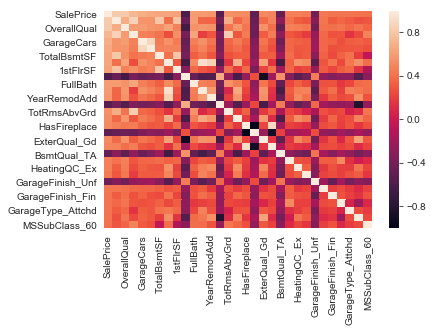

In [255]:
sns.heatmap(X_train[relevant_features.index].corr())

In [256]:
X_train = X_train.drop('SalePrice', axis = 1)
X_test = X_test

In [257]:
X_train.shape, X_test.shape, y.shape

((1458, 436), (1458, 436), (1458,))

In [258]:
from xgboost import XGBRegressor

model = XGBRegressor()

model.fit(X_train,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [259]:
y_pred = model.predict(X_test)
print("Mean Absolute Error : " + str(mean_absolute_error(y_pred, y)))

Mean Absolute Error : 0.43686695043359264


In [260]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
xgb_test = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
cv_score = cross_val_score(xgb_test, X_train, y, cv = 5, n_jobs=-1)

my_model = xgb_test.fit(X_train, y)
xgb_pred = my_model.predict(X_test)
print("Mean Absolute Error : " + str(mean_absolute_error(xgb_pred, y)))

Mean Absolute Error : 0.43560182071479864


In [262]:
pred = np.exp(y_pred)

In [276]:
df = pd.DataFrame({'Pred': xgb_pred, 'Actual':y})

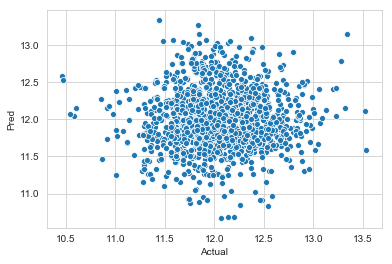

In [281]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = df)